In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
os.getcwd()

'/home/vizziwo/capcookie/models'

In [7]:
X_train = pd.read_csv('../data/processed/X1_train.csv', index_col=0)
X_test = pd.read_csv('../data/processed/X1_test.csv', index_col=0)
y_train = pd.read_csv('../data/processed/y1_train.csv', index_col=0)
y_test = pd.read_csv('../data/processed/y1_test.csv', index_col=0)

In [8]:
X_train.head()

,signs_of_mental_illness,body_camera,gender_F,gender_M,threat_level_attack,threat_level_not_attack,threat_level_unspecified,flee_Car,flee_Foot,flee_Not fleeing,...,armed_knife,armed_machete,armed_other,armed_sword,armed_toy weapon,armed_unarmed,armed_undetermined,armed_unknown weapon,armed_vehicle,standardized_age
2836,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.740107
1157,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.504791
744,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.269475
1448,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0.583230
3339,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.907106


In [9]:
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix, f1_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


## SVM, Out of the Box

time= 10.237619418010581
f1 score: 0.264423076923077


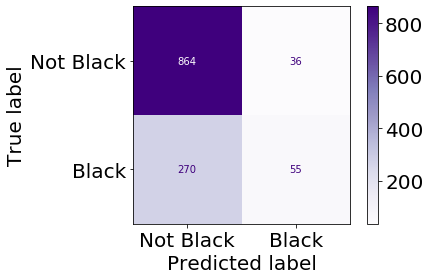

In [39]:
from timeit import default_timer as timer
start = timer()

svc= SVC(probability=True, random_state=2)

#fit training set
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)

#scores svc
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc=svc.score(X_test,y_test)
f1_svc = f1_score(y_test, y_predict_svc)
recall_svc = recall_score(y_test, y_predict_svc)
auc_svc = roc_auc_score(y_test, predprob)


end = timer()
print('time=', end-start)
print('f1 score:', f1_svc)
plot_confusion_matrix(svc, X_test, y_test, display_labels=['Not Black','Black'], cmap='Purples')

boxf1 = f1_svc

## SVM, Hyperparameter Tuning

In [10]:
from timeit import default_timer as timer

start = timer()

cw = ['balanced', None]

# svm.coef_ attribute is only availabel on linear kernels, so...
kernel = ['linear']

C = [0.01, .1, 1, 10, 100, 1000]
gamma = ['scale','auto']
grid = dict(class_weight=cw, kernel=kernel, C=C, gamma=gamma)

model = SVC()

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=5, scoring='f1', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

end=timer()
print('time:', end-start)

time: 6237.825781346997


In [11]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.550098 using {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.480945 (0.015864) with: {'C': 0.01, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.480945 (0.015864) with: {'C': 0.01, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
0.547346 (0.017489) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.547346 (0.017489) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}
0.121179 (0.015133) with: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
0.121179 (0.015133) with: {'C': 0.1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
0.548318 (0.013844) with: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.

time= 19.07865803904133
f1 score: 0.4999999999999999


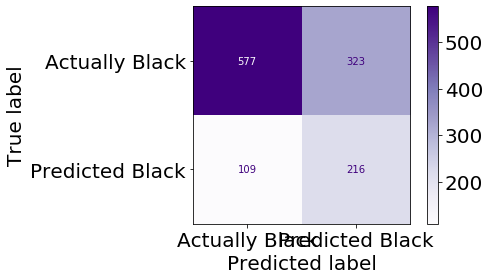

In [40]:
from timeit import default_timer as timer
start = timer()

#Best: 0.661085 using {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
svc= SVC(C=10, class_weight='balanced', gamma='scale', kernel='linear', probability=True, random_state=2)

#fit training set
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)

#scores svc
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc=svc.score(X_test,y_test)
f1_svc = f1_score(y_test, y_predict_svc)
recall_svc = recall_score(y_test, y_predict_svc)
auc_svc = roc_auc_score(y_test, predprob)


end = timer()
print('time=', end-start)
print('f1 score:', f1_svc)
plot_confusion_matrix(svc, X_test, y_test, display_labels=['Actually Black', 'Predicted Black'], cmap='Purples')

f1_original = f1_svc
plt.savefig('../reports/figures/blackonlymatrix.png', bbox_inches='tight')

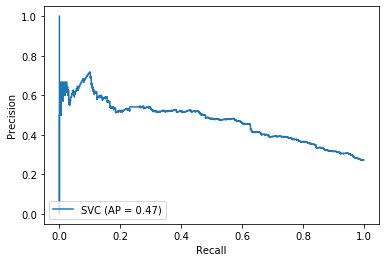

In [14]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(svc, X_test, y_test)

In [15]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(20,20))
    plt.rc('ytick', labelsize=20) 
    plt.rc('xtick', labelsize=20)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)   # fontsize of the x and y labels
    plt.title('Feature Importances for Tuned SVC Model')
    plt.xlabel('Size of Coefficient')
    plt.ylabel('Name of Feature')
    plt.show()

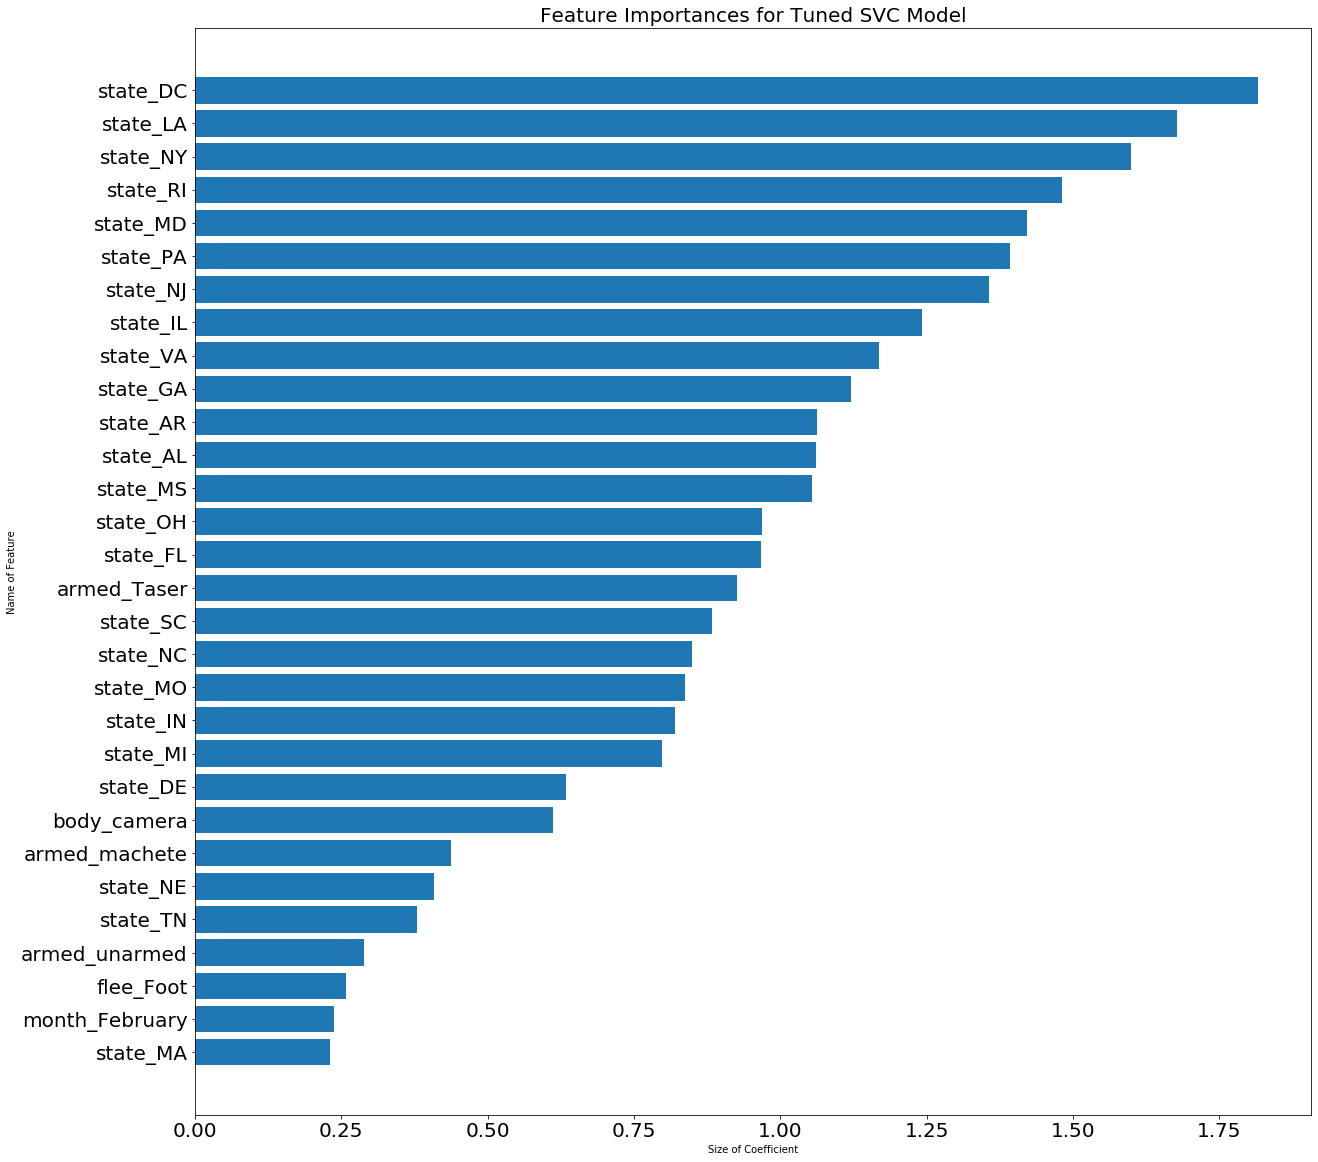

In [16]:
feature_names = X_test.columns[svc.coef_.argsort()[0, -30:]]
importances = np.sort(svc.coef_)[0, -30:]
f_importances(importances, feature_names)

#### This model has a relatively high F1 score and the feature importances that are readable.  Its highlighted features overlap somewhat with those of Logistic Regression models.

## Retuning the model with a lower C value to reduce the size of coefficients and highlight most important features.

time= 10.343864593014587
f1 score: 0.5041617122473245


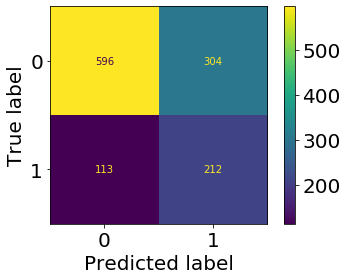

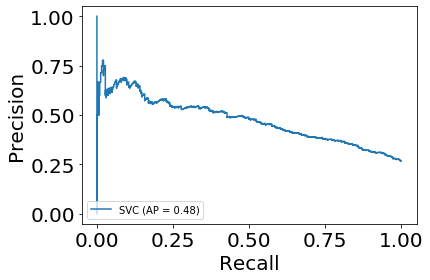

In [17]:
from timeit import default_timer as timer
start = timer()

#Best: 0.661085 using {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
svc= SVC(C=.1, class_weight='balanced', gamma='scale', kernel='linear', probability=True, random_state=2)

#fit training set
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)

#scores svc
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc=svc.score(X_test,y_test)
f1_svc = f1_score(y_test, y_predict_svc)
recall_svc = recall_score(y_test, y_predict_svc)
auc_svc = roc_auc_score(y_test, predprob)


end = timer()
print('time=', end-start)
print('f1 score:', f1_svc)
plot_confusion_matrix(svc, X_test, y_test)
plot_precision_recall_curve(svc, X_test, y_test)

f1_score_retuned = f1_svc

#### Retuned SVC Model with Lower C Value: Visualizing Feature Importances

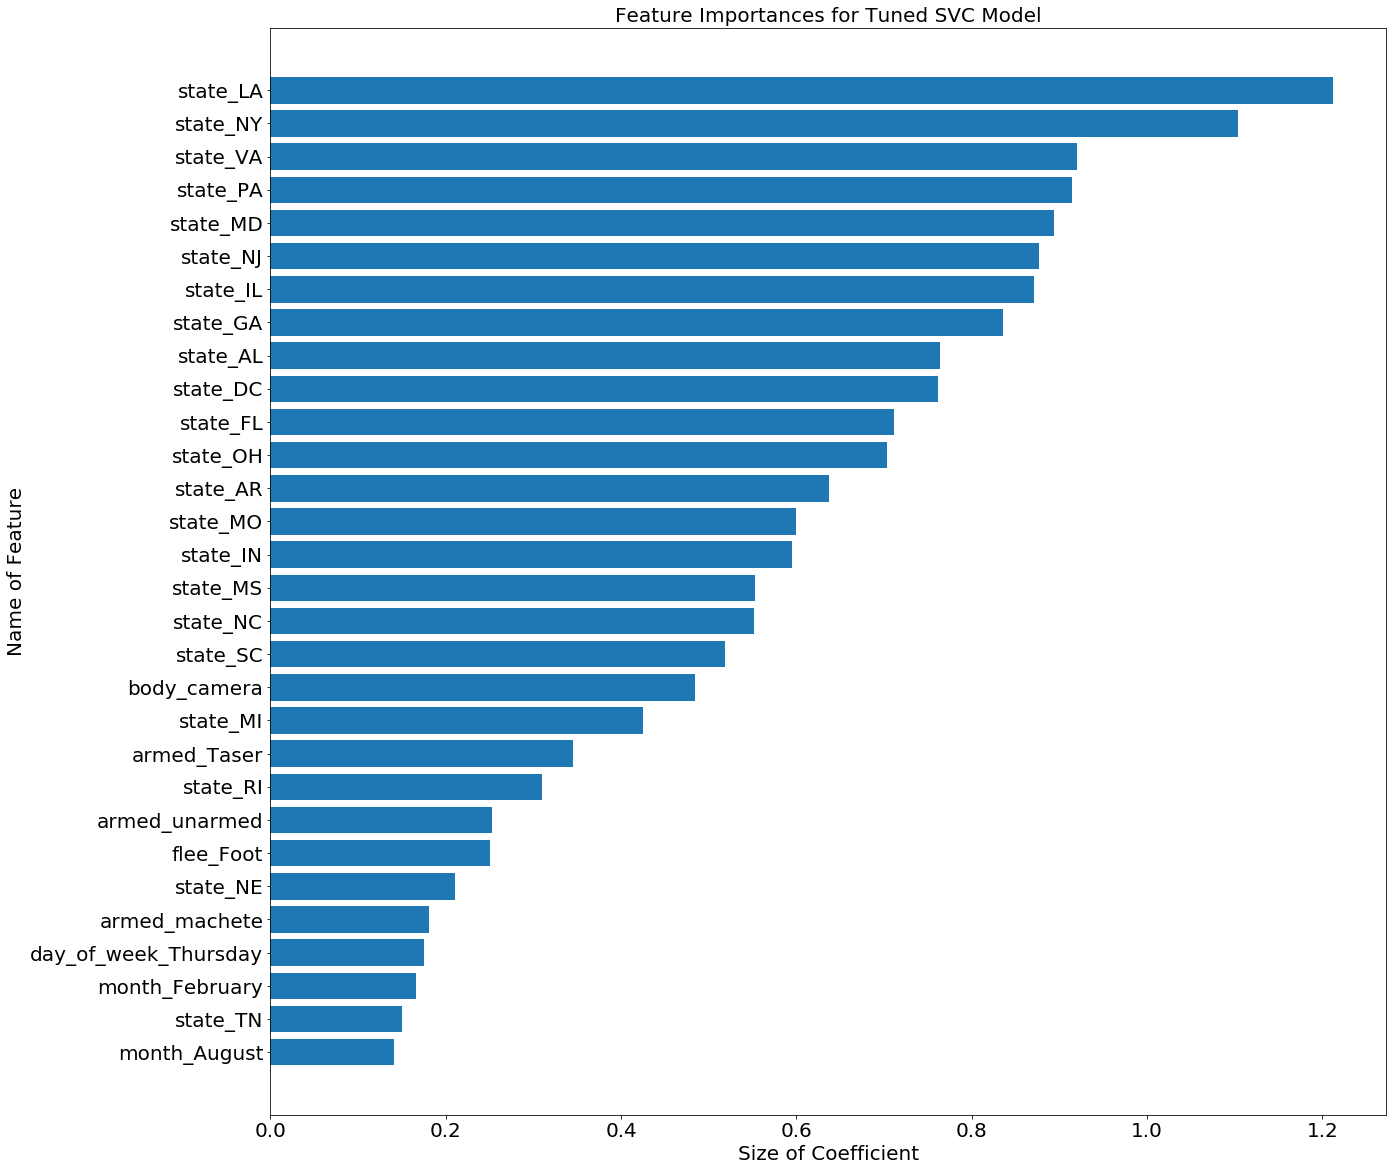

In [18]:
feature_names = X_test.columns[svc.coef_.argsort()[0, -30:]]
importances = np.sort(svc.coef_)[0, -30:]
f_importances(importances, feature_names)

#### This doesn't change the model significantly. The F1 Score is stil 0.65 and the top features include the same states but a slightly altered order.

## Resampling to Create More from Less Represented Class (Positive Class)

In [19]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values)

## Grid search on resampled data

In [ ]:
from timeit import default_timer as timer

start = timer()

cw = ['balanced']

# svm.coef_ attribute is only availabel on linear kernels, so...
kernel = ['linear']

C = [0.01, .1, 1, 10, 100, 1000]
gamma = ['scale','auto']
grid = dict(class_weight=cw, kernel=kernel, C=C, gamma=gamma)

model = SVC()

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=5, scoring='f1', error_score=0)
grid_result = grid_search.fit(X_train_res, y_train_res)

end=timer()
print('time:', end-start)

In [ ]:
scores=[]
parameters=[]

for mean, stdev, param in zip(means, stds, params):
    scores.append(mean)
    parameters.append(param)
    
scores= np.array(scores)
params=np.array(params)

ps = params[scores.argsort()[-10:]]
ss = scores[scores.argsort()[-10:]]

for p, s in zip(ps, ss):
    print(s, ':', p)

## Predicting on Test Data with Retuned Model, trained on Resampled Data

In [ ]:
start= timer()

svc= SVC(C=10, class_weight='balanced', gamma='scale', kernel='linear', probability=True)

#fit resampled data
svc.fit(X_train_res, y_train_res)
y_predict_svc_res = svc.predict(X_test)

#scores svc_resampled
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc_res=svc.score(X_test,y_test)
f1_svc_res = f1_score(y_test, y_predict_svc_res)
recall_svc_res = recall_score(y_test, y_predict_svc_res)
auc_svc_res = roc_auc_score(y_test, predprob)

end=timer()
print('time:',end-start)

print('f1 score:', f1_svc_res)
plot_confusion_matrix(svc, X_test, y_test)

f1_resampled = f1_svc_res

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(svc, X_test, y_test)

In [ ]:
feature_names = X_test.columns[svc.coef_.argsort()[0, -30:]]
importances = np.sort(svc.coef_)[0, -30:]
f_importances(importances, feature_names)

####  It is hard to read this because of so many negative coefficients. 
## Retuning the model with a lower C value to regularize the line.

In [ ]:
start= timer()

svc= SVC(C=.1, class_weight='balanced', gamma='scale', kernel='linear', probability=True, random_state=2)

#fit resampled data
svc.fit(X_train_res, y_train_res)
y_predict_svc_res = svc.predict(X_test)

#scores svc_resampled
predprob = svc.predict_proba(X_test)[:,1]
Accuracy_svc_res=svc.score(X_test,y_test)
f1_svc_res = f1_score(y_test, y_predict_svc_res)
recall_svc_res = recall_score(y_test, y_predict_svc_res)
auc_svc_res = roc_auc_score(y_test, predprob)

end=timer()
print('time:',end-start)

print('f1 score:', f1_svc_res)
plot_confusion_matrix(svc, X_test, y_test)

f1_resampled_retuned = f1_svc_res

In [ ]:
feature_names = X_test.columns[svc.coef_.argsort()[0, -30:]]
importances = np.sort(svc.coef_)[0, -30:]
f_importances(importances, feature_names)

#### The F1 Score for this regularized model was higher and the feature importances are easier to read. It also coincides with the features highlight by the Logistic Regression model. There is some overlap with the important features from the first SVC model that I made without the resampled data.

#### Summary of SVC:

In [ ]:
print('Tuned model:', f1_original)
print('Retuned with low C value:', f1_retuned)
print('Post-resampling tuned model:',f1_resampled)
print('Post-resampling with low C value:', f1_resampled_retuned)

#### RANDOM FOREST 

#### Plotting the effects of hyperparameters on the model to help determine the values tested in GridSearch 

In [ ]:
from sklearn.metrics import f1_score
max_depths = np.arange(1, 111, 10)
x_train = X_train
x_test = X_test
train_results = []
test_results = []
for max_depth in max_depths:
    model = RandomForestClassifier(max_depth=max_depth)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    f1 = f1_score(y_train, train_pred)
    train_results.append(f1)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    test_results.append(f1)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train F1')
line2, = plt.plot(max_depths, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('max_depths')
plt.show()


In [ ]:
x_train = X_train
x_test = X_test
n_estimators = [1, 20, 40, 60, 80, 100, 120, 150, 200]
train_results = []
test_results = []
for n_estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=n_estimator)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    f1 = f1_score(y_train, train_pred)
    train_results.append(f1)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    test_results.append(f1)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train F1')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('n_estimators')
plt.show()


In [ ]:
x_train = X_train
x_test = X_test
max_features = list(range(1,100))
train_results = []
test_results = []
for max_feature in max_features:
    model = RandomForestClassifier(max_features=max_feature)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    f1 = f1_score(y_train, train_pred)
    train_results.append(f1)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    test_results.append(f1)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train')
line2, = plt.plot(max_features, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('max features')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from timeit import default_timer as timer

start = timer()
model = RandomForestClassifier()
max_depth = [5,10,20,30,40]
criterion=['gini','entropy']
n_estimators = [25, 50, 100, 150, 200]
max_features= [5, 10, 20, 40, 60, 80]
class_weight=['balanced']
grid = dict(max_depth=max_depth, n_estimators=n_estimators, class_weight= class_weight, max_features=max_features, criterion=criterion)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

end = timer()
print(end - start)

####  Top 10 GridSearch Results

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

scores=[]
parameters=[]

for mean, stdev, param in zip(means, stds, params):
    scores.append(mean)
    parameters.append(param)
    
scores= np.array(scores)
params=np.array(params)
scores.argsort()[-10:]

ps = params[scores.argsort()[-10:]]
ss = scores[scores.argsort()[-10:]]

for p, s in zip(ps, ss):
    print(s, ':', p)

#### Using the best model parameters to model on the test data. 

In [ ]:
from sklearn.metrics import plot_confusion_matrix
#Best: 0.656406 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'n_estimators': 100}
model = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=10, max_features=5, n_estimators=100, random_state=2)
model.fit(X_train, y_train)
y_predict_rf = model.predict(X_test)
f1_rf = f1_score(y_test, y_predict_rf)
print(f1_rf)
plot_confusion_matrix(model, X_test, y_test)

f1rf_original = f1_rf

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model, X_test, y_test)

### Plot feature importances for Random Forest

In [ ]:
feature_names = X_test.columns[model.feature_importances_.argsort()[-30:]]
importances = np.sort(model.feature_importances_)[-30:]
f_importances(importances, feature_names)

#### This is hard to read because after the first 4 features, all the rest are similar. It also contradicts some of the features highlighted using the Logistics Regression model and the SVM model. Again, 'MT' shows up here but Montana had zero Black or Hispanic people in the fatal encounters dataset. 

### Random Forest GridSearch with Resampled Data

In [ ]:
start = timer()
model = RandomForestClassifier()
max_depth = [5,10,15,20,30]
criterion=['gini','entropy']
n_estimators = [50, 100, 150, 200]
max_features= [5, 10, 15, 20, 30]
class_weight=['balanced']
grid = dict(max_depth=max_depth, n_estimators=n_estimators, class_weight= class_weight, max_features=max_features, criterion=criterion)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train_res, y_train_res)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

end = timer()
print(end - start)

#### Top 10 GridSearch Results for Resampled Training Data 

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

scores=[]
parameters=[]

for mean, stdev, param in zip(means, stds, params):
    scores.append(mean)
    parameters.append(param)
    
scores= np.array(scores)
params=np.array(params)
scores.argsort()[-10:]

ps = params[scores.argsort()[-10:]]
ss = scores[scores.argsort()[-10:]]

for p, s in zip(ps, ss):
    print(s, ':', p)

#### Using best model parameters on test data

In [ ]:
#best model for test data was 3rd best GridSearch model
model = RandomForestClassifier(class_weight='balanced', criterion='gini', 
                               max_depth=20, max_features=5, n_estimators=200, random_state=2)
model.fit(X_train_res, y_train_res)
y_predict_rf = model.predict(X_test)
f1 = (f1_score(y_test, y_predict_rf))
print('F1:', f1)
plot_confusion_matrix(model, X_test, y_test)
plot_precision_recall_curve(model, X_test, y_test)

f1rf_resampled = f1

####  Plotting feature importance for Random Forest trained on a Resampled Model

In [ ]:
feature_names = X_test.columns[model.feature_importances_.argsort()[-30:]]
importances = np.sort(model.feature_importances_)[-30:]
f_importances(importances, feature_names)

#### This highlights different features but again, only the top 2 show real significance while the rest are very similar in coefficient. This also shows every single day of the week as an important feature. 

#### Summary Random Forest: 

In [ ]:
print('F1 of first tuned model:', f1rf_original)
pritn('F1 Score, post-resampling and retuning:', f1rf_resampled)